In [77]:
import numpy as np
from numpy.linalg import inv as inv
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fitting the $p(x)$ and $\lambda(x)$ functions to von Mises functions
- Generate a random distribution over a given range `x_bins`
- Write a function that generates a family of von Mises functions that tiles the $x$ - space.
- For a first analysis (and sicne we don't have scikit learn here), we'll use pseudoinverse to fit the distribution to the family of von Mises functions.
- Write another function that takes in these coefficients and spits out a continuous function $\phi(x)$

Text(0, 0.5, 'Frequency')

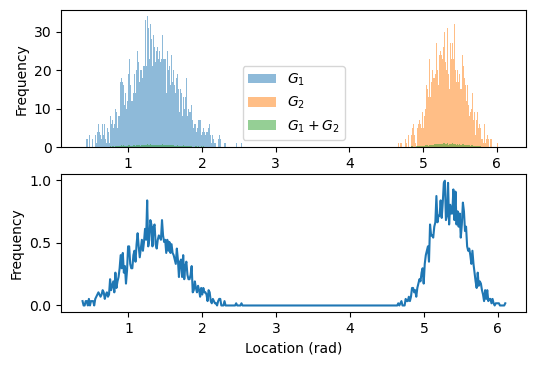

In [95]:
## generate two gaussians to represent p(x)
mu1, s1, mu2, s2 = [0.43*np.pi, 0.36, 1.7*np.pi, 0.23]
g1 = normal(mu1, s1, 2000)
g2 = normal(mu2, s2, 2000)
g3 = np.concatenate([g1, g2])

## plot g1 and g2
fig, ax = plt.subplots(2,1,dpi=100)

n1, bins1, patches1 = ax[0].hist(g1, bins=200, alpha=0.5, label='$G_1$')
n2, bins2, patches2 = ax[0].hist(g2, bins=200, alpha=0.5, label = '$G_2$')
n3, bins3, patches3 = ax[0].hist(g3, bins=400, alpha=0.5, label = '$G_1 + G_2$', density=True)
ax[0].legend()

ax[1].plot(bins3[:-1], n3)

ax[1].set_xlabel('Location (rad)')
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')


In [96]:
# concatenate the n and bins vectors
n_tot = np.append(n1, n2)
bins_tot = np.append(bins1, bins2)
print(f'n_tot = {n_tot}')
print(f'bins_tot: {bins_tot}')

n_tot = [ 2.  0.  0.  0.  2.  0.  2.  0.  3.  0.  2.  0.  2.  0.  2.  0.  3.  1.
  4.  4.  6.  4.  3.  2.  4.  6.  3.  6.  2.  5.  1.  5.  4.  1.  9.  8.
  6.  7.  5.  8.  6. 10.  9.  5. 10.  8.  8. 17. 18. 13. 17. 16. 11. 14.
  8. 10. 12. 19. 23. 15. 16. 12. 12. 20. 14. 19. 14. 20. 18. 25. 22. 17.
 20. 22. 20. 18. 21. 21. 20. 33. 21. 34. 31. 17. 23. 32. 28. 21. 23. 29.
 26. 22. 25. 14. 26. 23. 25. 22. 26. 23. 29. 23. 23. 23. 23. 14. 25. 20.
 20. 21. 16. 24. 20. 17. 20. 16. 14. 12. 18. 19. 15.  9. 17. 15. 14.  8.
 13. 18. 10. 13. 18.  8. 11. 10.  9.  9. 11. 15.  7.  5.  6.  6.  6.  4.
  5.  7.  7.  4.  7.  3.  4.  5.  7.  4.  3.  4.  4.  1.  5.  6.  3.  1.
  0.  3.  2.  1.  1.  1.  0.  0.  2.  1.  3.  2.  0.  0.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  2.  1.  1.
  2.  0.  2.  3.  0.  0.  6.  0.  3.  3.  5.  1.  6.  3.  3.  4.  1.  4.
  0.  7.  5.  4.  6.  7.  4.  6.  9.  5. 11

In [84]:
# define von Mises template function

def von_Mises_template(theta, k, theta_0):
    '''Returns a von Mises function b(theta) = exp(k cos(theta - theta_0))'''
    return np.exp(k*np.cos(theta - theta_0))

def span_x_von_Mises(num_functions, x_length):
    '''Returns a matrix X with every column having a von Mises function with different theta_0 spanning the track.
    x_length is the length of bin array for p(x) and lambda(x)'''
    # create a theta_0 array
    theta_0_arr = np.linspace(0., 2*np.pi, num_functions+1)

    # arbitrarily define k
    k = np.diff(theta_0_arr)[0]

    # define a location (x) array
    x = np.linspace(0., 2*np.pi, x_length)

    # define empty X-matrix
    X = np.empty([x.shape[0], theta_0_arr.shape[0]])

    # create the X-matrix
    for i, t in enumerate(theta_0_arr):
        X_column = von_Mises_template(x, k, t)
        X[:,i] = X_column

    return X, theta_0_arr

def pseudo_inverse_coefficients(X, y):
    '''Returns a vector of length of the number of von Mises functions used containing coefficients for each of them.
    Pseudo-inverse used.'''
    return inv(X.T@X)@X.T@y




Text(0, 0.5, 'Amplitude')

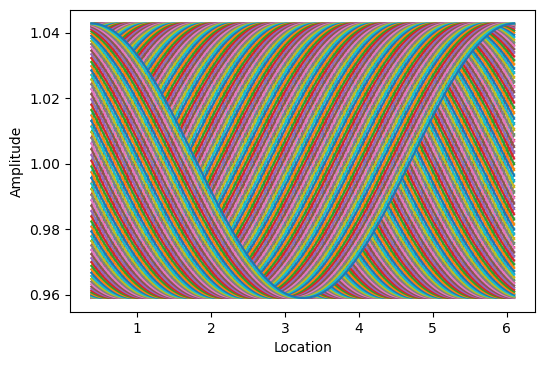

In [125]:
X, theta_0_arr = span_x_von_Mises(150, bins3.shape[0])
X = X[:-1, :]
fig, ax = plt.subplots(dpi=100)
ax.plot(bins3[:-1], X)
ax.set_xlabel('Location')
ax.set_ylabel('Amplitude')

In [126]:
## see if the pseudo-inverse actually worked!
A_pseudo_inverse = pseudo_inverse_coefficients(X, n3)

n3_predicted = X@A_pseudo_inverse

# make n3_predicted a PDF
n3_pred_integral = np.trapz(n3_predicted, bins3[:-1])
print(n3_pred_integral)

# normalized n3_predicted
n3_predicted = n3_predicted/abs(n3_pred_integral)

1.0581859435059577


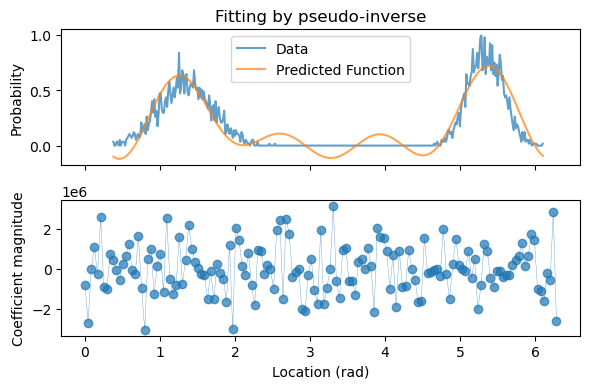

In [137]:
fig, ax = plt.subplots(2,1,dpi=100, sharex=True)
ax[0].plot(bins3[:-1], n3, label='Data', alpha=.7)
ax[0].plot(bins3[:-1],n3_predicted, label='Predicted Function', alpha=.7)
ax[0].set_ylabel('Probability')
ax[0].legend()
ax[0].set_title('Fitting by pseudo-inverse')

# plot the coefficients
ax[1].plot(theta_0_arr ,A_pseudo_inverse, lw=0.3, marker='o', alpha=.7)
ax[1].set_xlabel('Location (rad)')
ax[1].set_ylabel('Coefficient magnitude')
fig.tight_layout()

In [108]:
print(np.trapz(n3, bins3[:-1]))

0.9996250000000001
